## Clustering with K-Means

### Understand the principle of this technique and scenarios

K-means is an unsupervised non-hierarchical clustering algorithm. It enables the observations of the data set to be grouped into K distinct clusters. Thus, similar data will be found in the same cluster. Moreover, an observation can only be found in one cluster at a time (exclusive membership). The same observation cannot therefore belong to two different clusters.


The fields of application of K-Means are numerous, it is used in particular in:

customer segmentation according to a certain criterion (demographic, purchasing habit, etc.)
Use of Data Mining clustering when mining data to find similar individuals. Usually, once these populations are detected, other techniques can be used as needed.
Document clustering (grouping documents according to their content. Think about how Google News groups documents by topic.)

### Complexite

Complixite of clustering is, in general, O(N**2)

### A Note on clustering metrics


#### Adjusted_rand_score, rand_score

Rand index is a function that measures the similarity of the two assignments
Furthermore, both __rand_score__ __adjusted_rand_score__ are symmetric: swapping the argument does not change the scores.

#### Sillhouette_score

The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

#### Adjusted_mututal_information , Normalized_mutual_information

Adjusted Mutual Information (AMI). NMI is often used in the literature, while AMI was proposed more recently and is normalized against chance:
The Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations

#### Homogeneity, completeness and V-measure

Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional entropy analysis.

__homogeneity:__ each cluster contains only members of a single class.

__completeness:__ all members of a given class are assigned to the same cluster.

We can turn those concept as scores homogeneity_score and completeness_score. Both are bounded below by 0.0 and above by 1.0 (higher is better):

Their harmonic mean called V-measure is computed by 

__v_measure_score:__

beta defaults to a value of 1.0, but for using a value less than 1 for beta:

```
>>>metrics.v_measure_score(labels_true, labels_pred, beta=0.6)
0.54...
```

more weight will be attributed to homogeneity, and using a value greater than 1:

```
>>>metrics.v_measure_score(labels_true, labels_pred, beta=1.8)
0.48...
```

more weight will be attributed to completeness.
The V-measure is actually equivalent to the mutual information (NMI) discussed above, with the aggregation function being the arithmetic mean
Homogeneity, completeness and V-measure can be computed at once using __homogeneity_completeness_v_measure__

### Experiment and evaluate an algorithm of this class of learning problem: K-means (or K-means) on a simple data set.

In [26]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import sklearn
import matplotlib.pyplot as plt
import nltk

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [27]:
digits = load_digits()

# Show the dimensionality of the data
print("N samples x N feature:", digits.data.shape)

N samples x N feature: (1797, 64)


<Figure size 640x480 with 0 Axes>

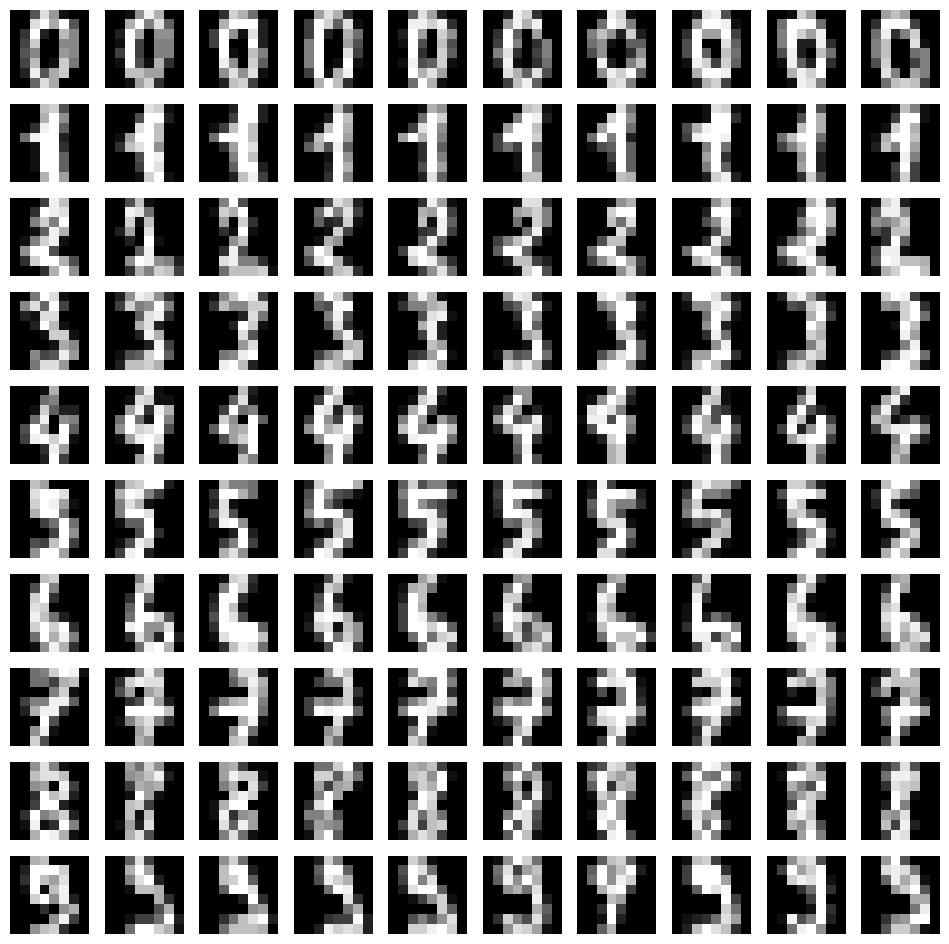

In [28]:
# Show several data for each label (== category) 

plt.gray() 

images = digits.images
Y = digits.target

unique_digits = np.unique(Y)
n_digits = len(unique_digits)

fig, axs = plt.subplots(n_digits, n_digits, figsize=(12, 12))
for i, target in enumerate(unique_digits):
    for j in range(n_digits):
        a = images[Y == target][j]
        axs[i,j].imshow(a)
        axs[i,j].axis('off')

In [29]:
# Compute some unsupervised score for the given model
def bench_k_means(estimator, data, y=None):
    estimator.fit(data)
    scores = [
        "adjusted_rand_score",
        "adjusted_mutual_info_score",
        "silhouette_score",
        "homogeneity_score",
        "completeness_score",
        "v_measure_score",
    ]

    results = []
    for s in scores:
        if s not in ["silhouette_score"]:
            # with ground-truth
            # Yeah !
            score = getattr(metrics, s)(y, estimator.labels_)
        elif y is not None:
            # with NO ground-truth
            score = getattr(metrics, s)(data, estimator.labels_)
        else:
            continue
            
        results.append(score)
        
    return pd.DataFrame([results], columns=scores, index=["result"])

In [31]:
# Try K-means

X = scale(digits.data)
y = digits.target

# Set K
K = n_digits

# Define model
model = KMeans(n_clusters=K, n_init=10)
# Test model
bench_k_means(model, X, y).round(2)

y

array([0, 1, 2, ..., 8, 9, 8])

1797

In [20]:
# Try doing the same using pipeline ?
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', PCA(2)), ('model', KMeans(n_clusters=K, n_init=10))])

y_pred3 = pipe.fit_predict(X)

y_pred3

array([9, 1, 9, ..., 9, 9, 4], dtype=int32)

In [22]:
# PCA Transformation - Reduce dimension to a 2D features shape.
pca = PCA(2)
X2 = pca.fit_transform(X)

model2 = KMeans(n_clusters=K, n_init=10)
y_pred2 = model.fit_predict(X2)

y_pred2

array([6, 7, 6, ..., 6, 6, 2], dtype=int32)

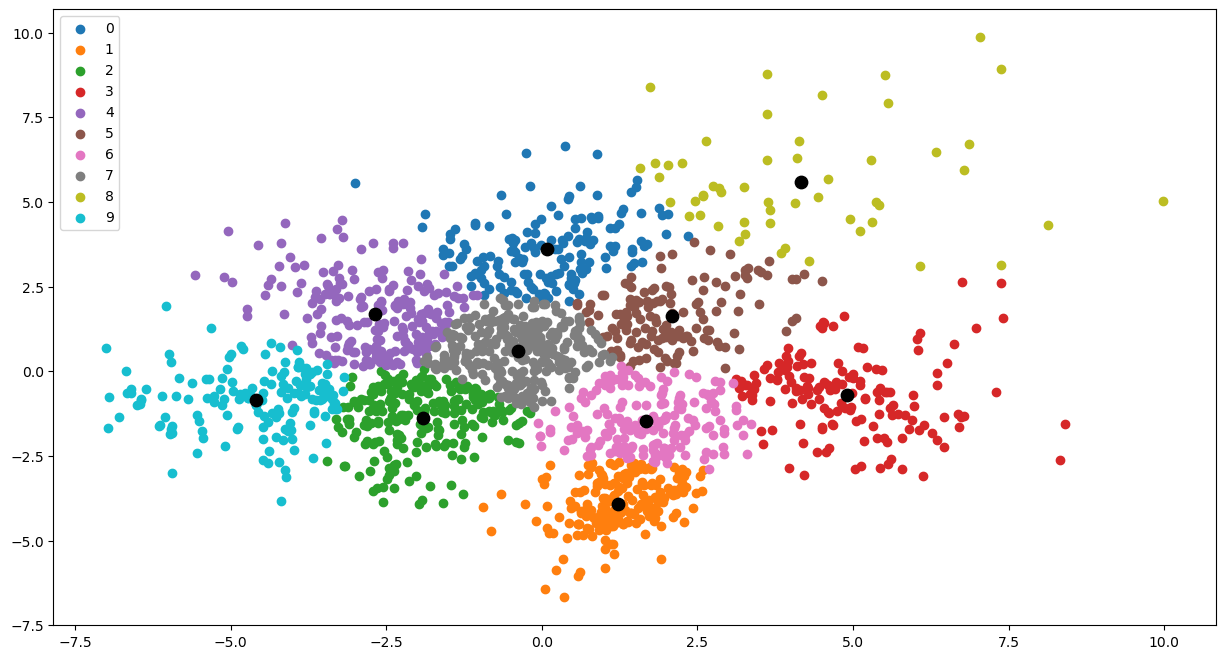

In [25]:
centroids = model.cluster_centers_
unique_labels = np.unique(y_pred3)
 
# Plot 2D result
fig = plt.figure(1, figsize=(15, 8))
for i in unique_labels:
    plt.scatter(X2[y_pred2 == i , 0] , X2[y_pred2 == i , 1] , label=i)
plt.scatter(centroids[:,0] , centroids[:,1] , s=80, color='k')
plt.legend()
plt.show()


==========================================================================================
---

1. Which model is better to find out the labels (the number assocviated to the image) between the first K-means model and the PCA reduced model
2. how it compares to a classification models to find out the correct number ?


==========================================================================================
---
